# Ordinary Least Squares

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
np.random.seed(9876789)

In [55]:
#OLS estimation
# Artificial data generation
nsample = 100  # Number of samples
x = np.linspace(0, 10, 100)  # Create a linearly spaced array
X = np.column_stack((x, x ** 2))  # Stack x and x^2 as columns in the design matrix X
beta = np.array([1, 0.1, 10])  # True coefficients
e = np.random.normal(size=nsample)  # Generate random normal errors

In [56]:
# Add a constant term to the design matrix X for the intercept
X = sm.add_constant(X)

# Create the dependent variable y using the linear model: y = X * beta + error
y = np.dot(X, beta) + e

In [57]:
# Create an Ordinary Least Squares (OLS) model
model = sm.OLS(y, X)

# Fit the OLS model to the data
results = model.fit()

# Print a summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.020e+06
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          2.83e-239
Time:                        13:55:16   Log-Likelihood:                -146.51
No. Observations:                 100   AIC:                             299.0
Df Residuals:                      97   BIC:                             306.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3423      0.313      4.292      0.0

In [58]:
# Set the number of samples, signal amplitude, and create a linearly spaced array
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)

# Create the design matrix X with columns x, sin(x), (x - 5)^2, and a constant term
X = np.column_stack((x, np.sin(x), (x - 5) ** 2, np.ones(nsample)))

# Set the true coefficients for the linear model: beta = [0.5, 0.5, -0.02, 5.0]
beta = [0.5, 0.5, -0.02, 5.0]

# Generate the true values of the dependent variable using the linear model: y_true = X * beta
y_true = np.dot(X, beta)

# Add random noise to the true values to simulate observed data
y = y_true + sig * np.random.normal(size=nsample)

In [59]:
# Fit an Ordinary Least Squares (OLS) model to the observed data
res = sm.OLS(y, X).fit()

# Print a summary of the regression results
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     211.8
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           6.30e-27
Time:                        13:55:16   Log-Likelihood:                -34.438
No. Observations:                  50   AIC:                             76.88
Df Residuals:                      46   BIC:                             84.52
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4687      0.026     17.751      0.0

In [60]:
print("Parameters: ", res.params)
print("Standard errors: ", res.bse)
print("Predicted values: ", res.predict())

Parameters:  [ 0.46872448  0.48360119 -0.01740479  5.20584496]
Standard errors:  [0.02640602 0.10380518 0.00231847 0.17121765]
Predicted values:  [ 4.77072516  5.22213464  5.63620761  5.98658823  6.25643234  6.44117491
  6.54928009  6.60085051  6.62432454  6.6518039   6.71377946  6.83412169
  7.02615877  7.29048685  7.61487206  7.97626054  8.34456611  8.68761335
  8.97642389  9.18997755  9.31866582  9.36587056  9.34740836  9.28893189
  9.22171529  9.17751587  9.1833565   9.25708583  9.40444579  9.61812821
  9.87897556 10.15912843 10.42660281 10.65054491 10.8063004  10.87946503
 10.86825119 10.78378163 10.64826203 10.49133265 10.34519853 10.23933827
 10.19566084 10.22490593 10.32487947 10.48081414 10.66779556 10.85485568
 11.01006072 11.10575781]


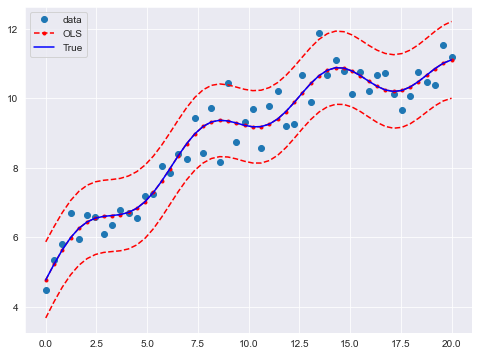

In [61]:
# Get prediction results from the fitted OLS model
pred_ols = res.get_prediction()

# Extract upper and lower confidence intervals from the prediction results
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

# Assuming x and y have different lengths, use the minimum length
n = min(len(x), len(y))

# Create a subplot for the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the data, OLS fitted values, and confidence intervals
ax.plot(x[:n], y[:n], "o", label="data")
ax.plot(x[:n], res.fittedvalues[:n], "r--.", label="OLS")
ax.plot(x[:n], iv_u[:n], "r--")
ax.plot(x[:n], iv_l[:n], "r--")
ax.plot(x[:n], res.fittedvalues[:n], "b-", label="True")  # Use fitted values as y_true
ax.legend(loc="best")

# Show the plot
plt.show()

# OLS with dummy variables

In [62]:
# Set the number of samples
nsample = 50

# Create an array to represent groups (0, 1, 2) for categorical variable
groups = np.zeros(nsample, int)
groups[20:40] = 1
groups[40:] = 2

# Convert categorical variable into dummy variables using pandas
dummy = pd.get_dummies(groups).values

# Create a linearly spaced array for the independent variable
x = np.linspace(0, 20, nsample)

# Create the design matrix X with columns x and dummy variables
X = np.column_stack((x, dummy[:, 1:]))

# Add a constant term to the design matrix X (prepend=False means not to prepend the constant column)
X = sm.add_constant(X, prepend=False)

# Set the true coefficients for the linear model: beta = [1.0, 3, -3, 10]
beta = [1.0, 3, -3, 10]

# Generate the true values of the dependent variable using the linear model: y_true = X * beta
y_true = np.dot(X, beta)

# Add random noise to the true values to simulate observed data
e = np.random.normal(size=nsample)
y = y_true + e


In [63]:
# Inspect the data
print(X[:5, :])
print(y[:5])
print(groups)
print(dummy[:5, :])

[[0.         0.         0.         1.        ]
 [0.40816327 0.         0.         1.        ]
 [0.81632653 0.         0.         1.        ]
 [1.2244898  0.         0.         1.        ]
 [1.63265306 0.         0.         1.        ]]
[ 9.28223335 10.50481865 11.84389206 10.38508408 12.37941998]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2]
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [64]:
# Fit an Ordinary Least Squares (OLS) model to the observed data
res2 = sm.OLS(y, X).fit()

# Print a summary of the regression results
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     671.7
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           5.69e-38
Time:                        13:55:17   Log-Likelihood:                -64.643
No. Observations:                  50   AIC:                             137.3
Df Residuals:                      46   BIC:                             144.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9999      0.060     16.689      0.0

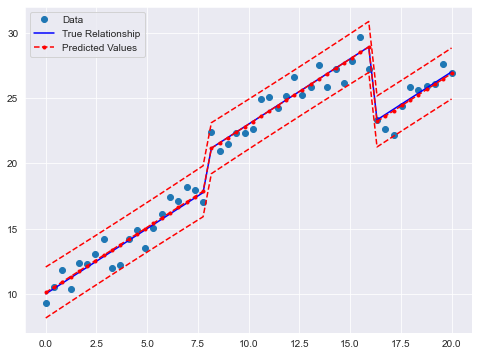

In [65]:
# Get prediction results from the fitted OLS model (assuming res2 is the OLS result)
pred_ols2 = res2.get_prediction()

# Extract upper and lower confidence intervals from the prediction results
iv_l = pred_ols2.summary_frame()["obs_ci_lower"]
iv_u = pred_ols2.summary_frame()["obs_ci_upper"]

# Create a subplot for the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the data, true relationship, predicted values, and confidence intervals
ax.plot(x, y, "o", label="Data")
ax.plot(x, y_true, "b-", label="True Relationship")
ax.plot(x, res2.fittedvalues, "r--.", label="Predicted Values")
ax.plot(x, iv_u, "r--")
ax.plot(x, iv_l, "r--")

# Add legend to the plot
legend = ax.legend(loc="best")

# Show the plot
plt.show()

# Rolling Regression

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import seaborn
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS
seaborn.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
%matplotlib inline

In [67]:
# Retrieve Fama-French research data factors using pandas_datareader
factors = pdr.get_data_famafrench('F-F_Research_Data_Factors', start='1-1-1926')[0]

# Print the first few rows of the factors dataset
print("Fama-French Research Data Factors:")
print(factors.head())

Fama-French Research Data Factors:
         Mkt-RF   SMB   HML    RF
Date                             
1926-07    2.96 -2.56 -2.43  0.22
1926-08    2.64 -1.17  3.82  0.25
1926-09    0.36 -1.40  0.13  0.23
1926-10   -3.24 -0.09  0.70  0.32
1926-11    2.53 -0.10 -0.51  0.31


In [68]:
# Retrieve Fama-French 10 Industry Portfolios data using pandas_datareader
industries = pdr.get_data_famafrench('10_Industry_Portfolios', start='1-1-1926')[0]

# Print the first few rows of the industries dataset
print("Fama-French 10 Industry Portfolios Data:")
print(industries.head())

Fama-French 10 Industry Portfolios Data:
         NoDur  Durbl  Manuf  Enrgy  HiTec  Telcm  Shops  Hlth   Utils  Other
Date                                                                         
1926-07   1.45  15.55   4.69  -1.18   2.90   0.83   0.11   1.77   7.04   2.13
1926-08   3.97   3.68   2.81   3.47   2.66   2.17  -0.71   4.25  -1.69   4.35
1926-09   1.14   4.80   1.15  -3.39  -0.38   2.41   0.21   0.69   2.04   0.29
1926-10  -1.24  -8.23  -3.63  -0.78  -4.58  -0.11  -2.29  -0.57  -2.63  -2.84
1926-11   5.20  -0.19   4.10   0.01   4.71   1.63   6.43   5.42   3.71   2.11


In [69]:
# Calculate the dependent variable 'endog' as the difference between 'HiTec' and the risk-free rate
endog = industries.HiTec - factors.RF.values

# Create the design matrix 'exog' with a constant term and 'Mkt-RF' factor
exog = sm.add_constant(factors['Mkt-RF'])

# Initialize RollingOLS with a rolling window of 60 observations
rols = RollingOLS(endog, exog, window=60)

# Fit the RollingOLS model to the data
rres = rols.fit()

# Get the estimated parameters from the RollingOLS results
params = rres.params

# Print the first few and last few rows of the estimated parameters
print("Estimated Parameters (First Few Rows):")
print(params.head())

print("\nEstimated Parameters (Last Few Rows):")
print(params.tail())

Estimated Parameters (First Few Rows):
         const  Mkt-RF
Date                  
1926-07    NaN     NaN
1926-08    NaN     NaN
1926-09    NaN     NaN
1926-10    NaN     NaN
1926-11    NaN     NaN

Estimated Parameters (Last Few Rows):
            const    Mkt-RF
Date                       
2023-09  0.467433  1.089181
2023-10  0.503117  1.082687
2023-11  0.587508  1.090195
2023-12  0.528967  1.095849
2024-01  0.558506  1.098306


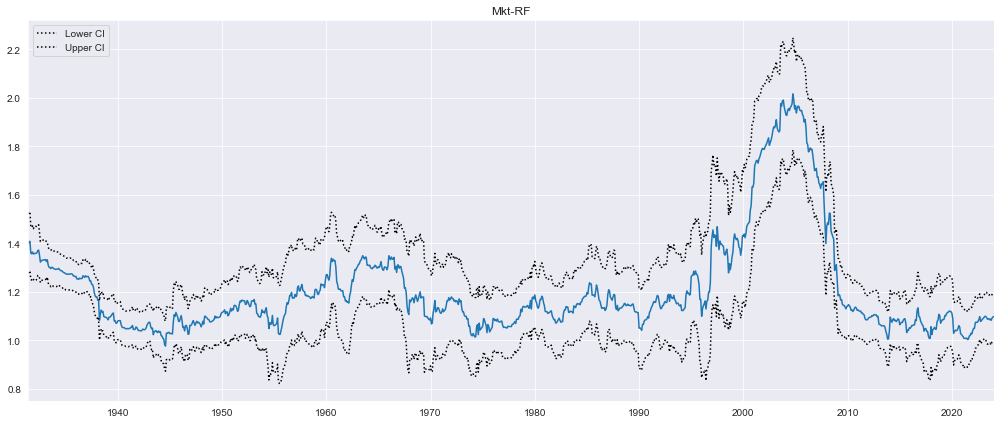

In [70]:
# Plot the recursive coefficients of the RollingOLS model for the variable 'Mkt-RF'
fig = rres.plot_recursive_coefficient(variables=['Mkt-RF'], figsize=(14, 6))

# The plot shows the evolution of the estimated coefficient for the 'Mkt-RF' factor over time.

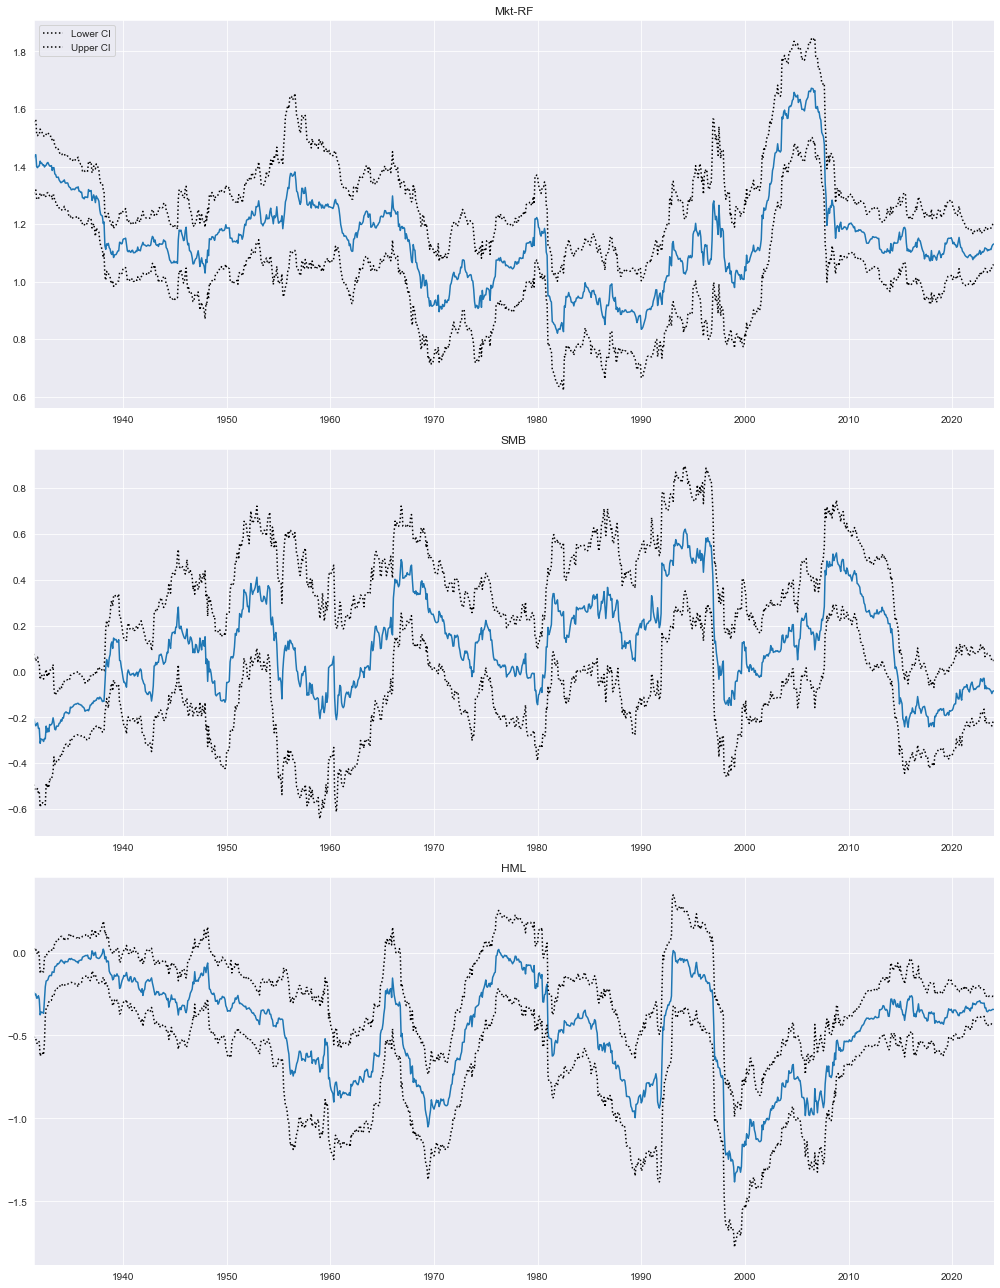

In [71]:
# Define the list of explanatory variables
exog_vars = ['Mkt-RF', 'SMB', 'HML']

# Create the design matrix 'exog' with a constant term and specified explanatory variables
exog = sm.add_constant(factors[exog_vars])

# Initialize RollingOLS with a rolling window of 60 observations
rols = RollingOLS(endog, exog, window=60)

# Fit the RollingOLS model to the data
rres = rols.fit()

# Plot the recursive coefficients of the RollingOLS model for the specified variables
fig = rres.plot_recursive_coefficient(variables=exog_vars, figsize=(14, 18))

# The plot shows the evolution of the estimated coefficients for the specified variables (e.g., 'Mkt-RF', 'SMB', 'HML') over time.

In [72]:
# Rolling Regression Formulas

# Concatenate Fama-French factors and industry portfolio returns into a single DataFrame
joined = pd.concat([factors, industries], axis=1)

# Rename the 'Mkt-RF' column to 'Mkt_RF' for compatibility with the formula
joined['Mkt_RF'] = joined['Mkt-RF']

# Initialize RollingOLS using a formula for the rolling regression with a window of 60 observations
mod = RollingOLS.from_formula('HiTec ~ Mkt_RF + SMB + HML', data=joined, window=60)

# Fit the RollingOLS model to the data
rres = mod.fit()

# Print the last few rows of the estimated parameters
print("Estimated Parameters (Last Few Rows):")
print(rres.params.tail())

Estimated Parameters (Last Few Rows):
         Intercept    Mkt_RF       SMB       HML
Date                                            
2023-09   0.526829  1.110522 -0.087064 -0.354267
2023-10   0.541961  1.109685 -0.093918 -0.353917
2023-11   0.630157  1.121986 -0.105796 -0.350210
2023-12   0.623413  1.127696 -0.091813 -0.345713
2024-01   0.637316  1.130686 -0.092447 -0.346699


In [73]:
# Fit Options

# Measure the time taken to fit the RollingOLS model without constraints
%timeit rols.fit()

# Measure the time taken to fit the RollingOLS model with only estimating parameters (no additional computations)
%timeit rols.fit(params_only=True)

132 ms ± 1.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
45.9 ms ± 37.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
